<a href="https://colab.research.google.com/github/jeyakumar-nanc/CS634-CNN-RNN/blob/main/CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fashion MNIST Classification with RNNs**






The first model of the network has a single layer of 128 filters.  The dropout of 20% is then used to regulate overfitting. The Next layer is a dense layer with a softmax activation function and has 128 neurons. and drop out of 1% is included to minimize the overfitting. The last layer is a dense layer with a softmax activation function that classifies the 10 categories of the data and has 10 neurons.

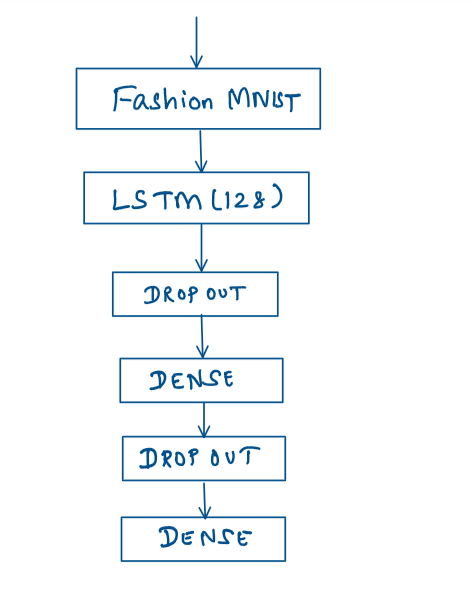

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#type(fashion_mnist)

**RNN Implementation**

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

#train_images = train_images / 255.0 #normalize the images to fall b/w 0 and 1
#test_images = test_images / 255.0

model = tf.keras.Sequential();

no_of_units = 10
no_of_steps = 28
no_of_inputs = 28
no_of_outputs = 10
batch_size = 150
no_of_epochs = 10

model.add(tf.keras.layers.LSTM(128, input_shape=(no_of_steps, no_of_inputs)))
model.add(tf.keras.layers.Dropout(0.2)) # to minimize overfitting
model.add(tf.keras.layers.Dense(64, activation='softmax'))
model.add(tf.keras.layers.Dropout(0.01)) # to minimize overfitting
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#model.add(tf.keras.layers.Dense(no_of_outputs))   # For the output class


model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
start_time = dt.datetime.now()
#feed the model, accuracy of training set
model.fit(train_images, train_labels, epochs=10)
end_time = dt.datetime.now()
print('Time taken to train RNN:', end_time-start_time)

#Evaluate accuracy of the test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Test Loss: {0} - Test Accuracy: {1}".format(test_loss, test_acc))

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 89,290
Trainable params: 89,290
Non-trainable params: 0
_______________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 27s 12ms/step - loss: 1.5481 - accuracy: 0.4789
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 1.1307 - accuracy: 0.5268
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9960 - accuracy: 0.5961
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8638 - accuracy: 0.6557
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7968 - accuracy: 0.6754
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7011 - accuracy: 0.7382
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6254 - accuracy: 0.7788
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5816 - accuracy: 0.7936
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5646 - accuracy: 0.8011
Epoch 10/10
1875/1875 [==============================] - 22s 12ms/step - lo

**CNN Implementation**

In [4]:

# from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='softmax'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

model.summary()
start_time = dt.datetime.now()
model.fit(train_X, train_Y_one_hot, batch_size=150, epochs=10)
end_time = dt.datetime.now()
print('Time taken to train CNN:', end_time-start_time)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print("Test Loss: {0} - Test Accuracy: {1}".format(test_loss, test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout_2 (Dropout)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                692288    
                                                      

**Performance Comparison**

***RNN Findings***
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650 

*Time taken to train RNN: 0:04:23.687102
Test Loss: 0.538550615310669 - Test Accuracy: 0.8068000078201294*

***CNN Findings***
_________________________________________________________________
 Layer (type)                Output Shape              Param # 
_________________________________________________________________  
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout_2 (Dropout)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                692288    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 

*Time taken to train CNN: 0:00:41.839804
Test Loss: 0.46643397212028503 - Test Accuracy: 0.8511000275611877*

From the above report, for the batch size of 150 time taken for CNN is less when compared to RNN. Similarly the accuracy of CNN is better than RNN for the fashion MNIST data. And test loss is also minimized in CNN.

**CNN + RNN**


A unified framework to overcome label correlation and semantic redundancy challenges in multilabel image classification. The architecture of the CNN-RNN framework is as follows. CNN is to model the images and image represenation. RNN is to model the correlation of the labels. It captures the information of the previously predicted labels. The output label probability is computed according to the image representation and output of the RNN.
Training of the models was achieved by using the cross entropy loss on the softmax normalization and back propogation through time using rms prop. Label order during training determined according to their occurrence frequencies in the training data. More frequent labels appear earlier than the less frequent ones.
This combination of CNN-RNN gives the advantages of 1) End to end model to utilize both semantic redundancy and label correlation.Ability to generate multiple labels, and the CNN-RNN model also effectively learns a joint label or image embedding. 2) The attention visualization shows that the proposed model can steer its attention to different image regions when predicting different labels.
3) Recurrent neuron is more compact and more powerful model of high order label correlation than other label co-occurrence models in this
task


